In [ ]:
!pip install tensorflow
!pip install keras
!pip install imutils
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install scipy


In [ ]:
python --version

In [ ]:
# pip install tensorflow


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# !pip install --upgrade tensorflow numpy opencv-python imutils matplotlib scipy


In [ ]:

# !pip install keras==2.3.1


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import DenseNet121
# from tensorflow.keras.layers import AveragePooling2D, Dropout


In [ ]:
# /content/drive/MyDrive/with_mask
# /content/drive/MyDrive/without_mask

# initialize the initial learning rate, number of epochs to train for,
# and batch size
# INIT_LR = 1e-4
INIT_LR = 0.001
EPOCHS = 10
BS = 32

DIRECTORY = r"/content/drive/MyDrive/MProject_dataset"
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")


[INFO] loading images...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data[0]
# /content/drive/MyDrive/dataset/dataset/with_mask/01.jpg

array([[[-0.9372549 , -0.92941177, -0.9137255 ],
        [-0.8352941 , -0.827451  , -0.7882353 ],
        [-0.88235295, -0.88235295, -0.81960785],
        ...,
        [-0.8509804 , -0.88235295, -0.8745098 ],
        [-0.00392157, -0.02745098, -0.09803921],
        [-0.84313726, -0.8666667 , -0.92156863]],

       [[-0.9372549 , -0.92941177, -0.9137255 ],
        [-0.88235295, -0.8745098 , -0.8352941 ],
        [-0.8745098 , -0.8745098 , -0.8117647 ],
        ...,
        [-0.8980392 , -0.92941177, -0.92156863],
        [-0.31764704, -0.34117645, -0.41176468],
        [-0.7647059 , -0.7882353 , -0.84313726]],

       [[-0.9372549 , -0.92941177, -0.9137255 ],
        [-0.85882354, -0.8509804 , -0.8117647 ],
        [-0.88235295, -0.88235295, -0.81960785],
        ...,
        [-0.9137255 , -0.94509804, -0.9372549 ],
        [-0.04313725, -0.06666666, -0.1372549 ],
        [-0.60784316, -0.6313726 , -0.6862745 ]],

       ...,

       [[-0.9372549 , -0.94509804, -0.9607843 ],
        [-0

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
len(labels)

4103

In [ ]:
!pip install iterative-stratification

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
# Your other code here

# Initialize StratifiedKFold
skf = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Iterate through the folds
for train_index, test_index in skf.split(data, labels):
    X_train, X_test = data[train_index], data[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]

In [ ]:
# # Set the number of folds
# n_splits = 3  # You can change this to the desired number of folds

# # Initialize StratifiedKFold
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Iterate through the folds
# for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Now you can use X_train, X_test, y_train, y_test in your machine learning model
#     # Train your model on X_train and y_train, and evaluate on X_test and y_test
#     # Repeat this process for each fold

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model using the Adam optimizer without the decay parameter
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] compiling model...


In [ ]:
# from tensorflow.keras.optimizers import Adam

# # ...

# # Compile the model using the Adam optimizer
# print("[INFO] compiling model...")
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [ ]:
# # compile our model
# print("[INFO] compiling model...")
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])

In [ ]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/10
102/102 [==============================] - 235s 2s/step - loss: 0.1158 - accuracy: 0.9591 - val_loss: 0.0452 - val_accuracy: 0.9842
Epoch 2/10
102/102 [==============================] - 214s 2s/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0399 - val_accuracy: 0.9854
Epoch 3/10
102/102 [==============================] - 226s 2s/step - loss: 0.0440 - accuracy: 0.9837 - val_loss: 0.0477 - val_accuracy: 0.9817
Epoch 4/10
102/102 [==============================] - 220s 2s/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0341 - val_accuracy: 0.9878
Epoch 5/10
102/102 [==============================] - 214s 2s/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0295 - val_accuracy: 0.9866
Epoch 6/10
102/102 [==============================] - 226s 2s/step - loss: 0.0329 - accuracy: 0.9874 - val_loss: 0.0251 - val_accuracy: 0.9903
Epoch 7/10
102/102 [==============================] - 221s 2s/step - loss: 0.0234 - accuracy: 0.9905 - val_loss: 0.029

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")


[INFO] evaluating network...
26/26 [==============================] - 34s 1s/step
              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       433
without_mask       0.99      0.98      0.98       388

    accuracy                           0.98       821
   macro avg       0.98      0.98      0.98       821
weighted avg       0.98      0.98      0.98       821

[INFO] saving mask detector model...


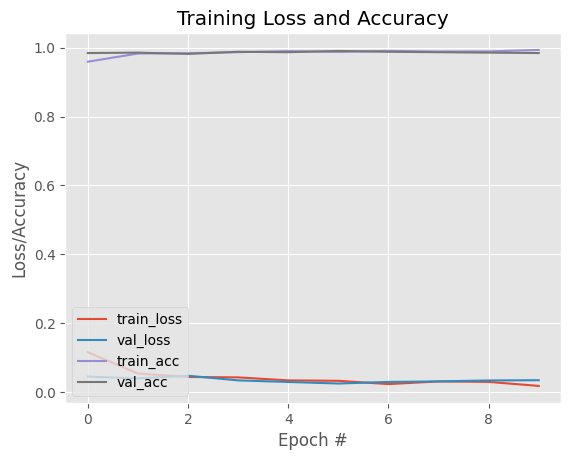

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming data and labels are your input arrays
# Reshape data to a 2D array
data_reshaped = [img.flatten() for img in data]
print(data_reshaped)
# Split data into training and testing sets
X_tr, X_te, y_tr, y_te = train_test_split(data_reshaped, labels, test_size=0.2, random_state=42)

# Create SVM model
svm_model = svm.SVC(kernel='linear')

# Train the model
svm_model.fit(X_tr, y_tr)

# Make predictions
svm_predictions = svm_model.predict(X_te)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_te, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy}")